# problem statement 1.2

### Customer Churn prediction

***Problem Statement***

Build a predictive model to estimate the likelihood of customer churn for a telecommunication company. To model should consider factors such as customer demographics, Usage pattrens, Bilining History and customer service interactions,


#### importing the Libraries requried for the churn prediction

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
import warnings
warnings.filterwarnings("ignore")

# Data collection

i have collected or downloaded the data from these link it is from the **kaggle**

link :- **https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code**

### Loading the Dataset

In [487]:
data=pd.read_csv(r"customer_churn.csv")

In [488]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Understanding

#### Information about the data

In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above information i  can see that there are **no null** values in the dataset the no of **data points** consists of **7043** and the no of **features** are **20** and from the above data i can see datatype values that are Given information i can see that TotalCharges has the wrong data type
* **float64** :- 1 ,
* **int64** :- 1, 
* **object** :- 18

## Cleaning the Data

#### Converting the TotalCharges from **object** to **float**

from the informmation of the data given i can see that ***TotalCharges*** is in **object** but i should be in the **float** value

In [490]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [491]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


from the data i can see that **SeniorCitizen** should be an **categorical value** but it is given as an **integer value**

In [492]:
data["SeniorCitizen"]=data["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [493]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Checking the information of the data again is there any null values present in my dataset for the TotalCharges

In [494]:
data["TotalCharges"].isna().sum()

11

Basically the  data is **imblanced data** let us check based on the **Churn wheather** how many **Yes are no present** if there are **No** then we can **drop those columns** because our data has lot of **No's** and if it is **yes** then lets us do with the mean or median or based on the statistical knowleadge

In [495]:
data[data["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


I can see that there are **11 null values** from the data

##### Droping the null values from the above data

In [496]:
data=data[data["TotalCharges"].notna()]

### Checking the no of unique values 

In [497]:
for i in data.select_dtypes("object").columns:
    print(f"{i} :- ",data[i].nunique())

customerID :-  7032
gender :-  2
SeniorCitizen :-  2
Partner :-  2
Dependents :-  2
PhoneService :-  2
MultipleLines :-  3
InternetService :-  3
OnlineSecurity :-  3
OnlineBackup :-  3
DeviceProtection :-  3
TechSupport :-  3
StreamingTV :-  3
StreamingMovies :-  3
Contract :-  3
PaperlessBilling :-  2
PaymentMethod :-  4
Churn :-  2


In [522]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [521]:
for i in data.select_dtypes("object").columns:
    print(f"{i} :- ",data[i].unique())

customerID :-  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :-  ['Female' 'Male']
SeniorCitizen :-  ['No' 'Yes']
Partner :-  ['Yes' 'No']
Dependents :-  ['No' 'Yes']
PhoneService :-  ['No' 'Yes']
MultipleLines :-  ['No phone service' 'No' 'Yes']
InternetService :-  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :-  ['No' 'Yes' 'No internet service']
OnlineBackup :-  ['Yes' 'No' 'No internet service']
DeviceProtection :-  ['No' 'Yes' 'No internet service']
TechSupport :-  ['No' 'Yes' 'No internet service']
StreamingTV :-  ['No' 'Yes' 'No internet service']
StreamingMovies :-  ['No' 'Yes' 'No internet service']
Contract :-  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :-  ['Yes' 'No']
PaymentMethod :-  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :-  ['No' 'Yes']


From the above information of the data i can see that all the ***customer id's*** are **unique**

Target Variable is Churn which as **two unique values** therefore it is the **Binary classification**

In [498]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [499]:
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

The above data is **imbalanced data** because 

* **No** :- **5174**
* **Yes** :- **1869**

<Axes: xlabel='Churn', ylabel='count'>

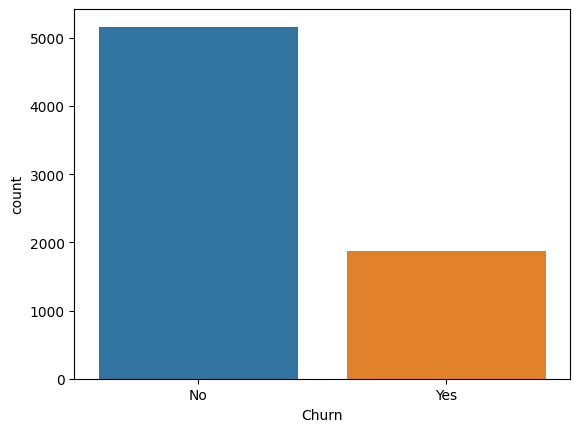

In [500]:
sns.barplot(data["Churn"].value_counts(),palette=sns.color_palette())

### Descriptive Statistics about the Data

In [501]:
data.describe() #for the numerical values

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [502]:
data.describe(include="object")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Exploratortry Data Analysis

In [503]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


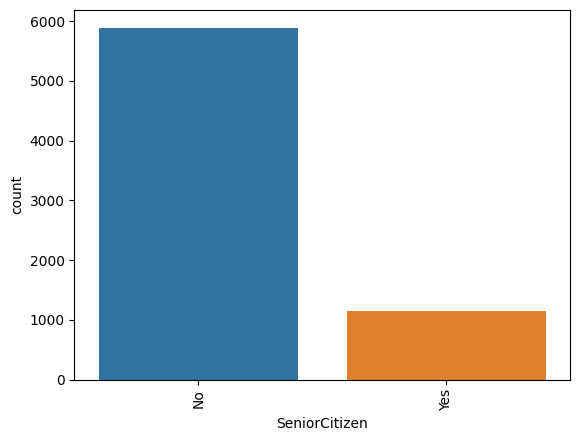

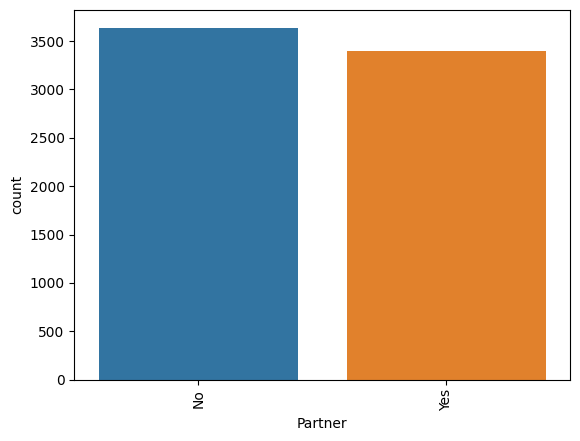

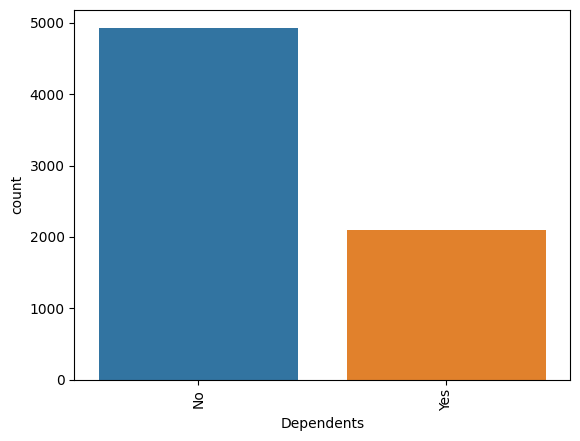

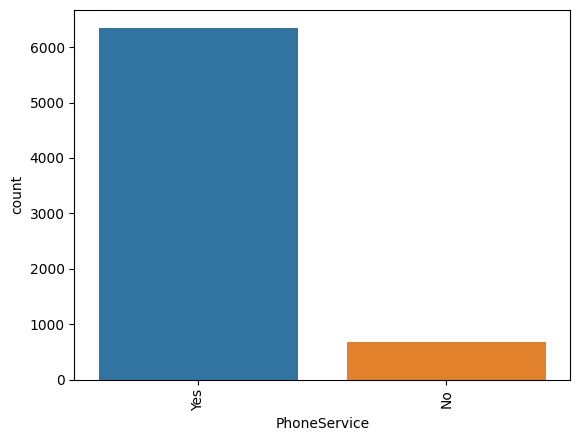

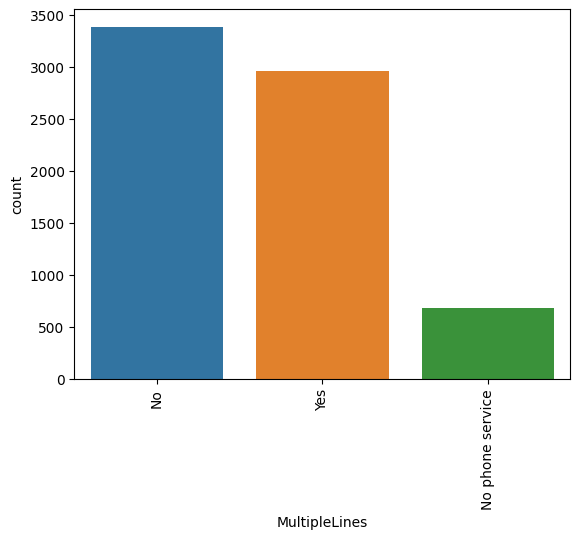

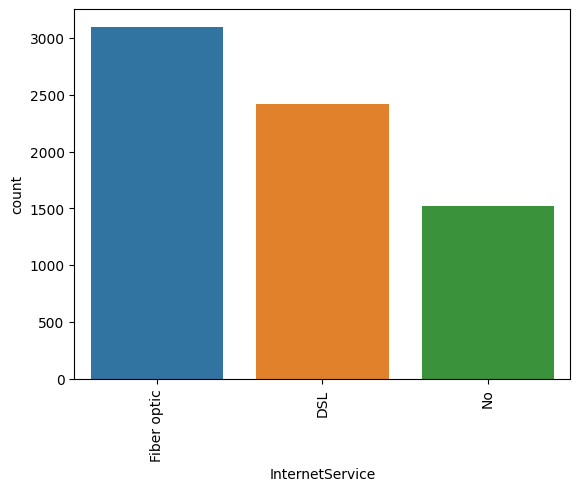

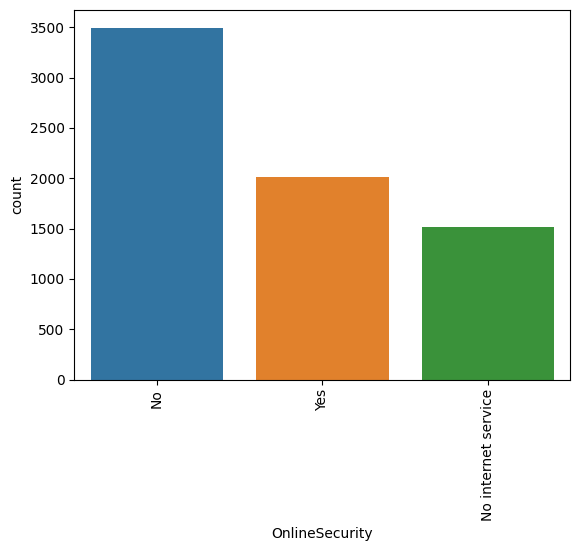

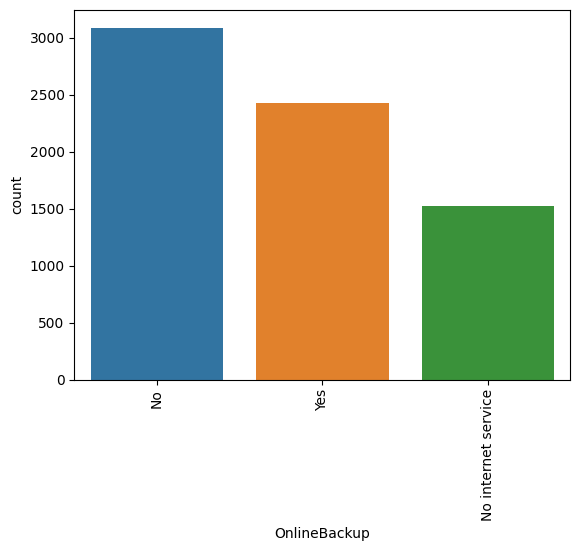

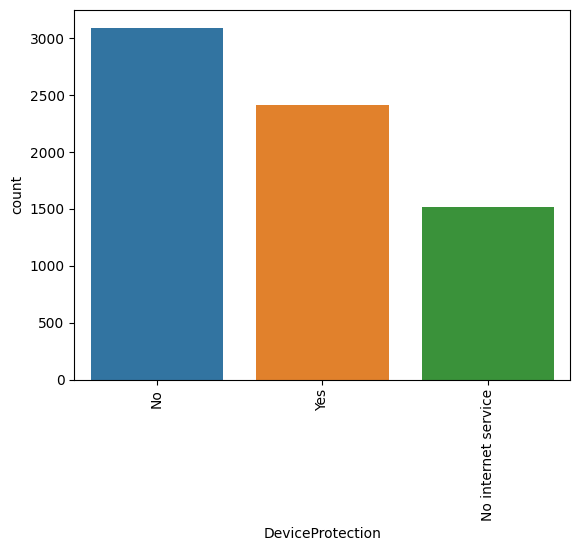

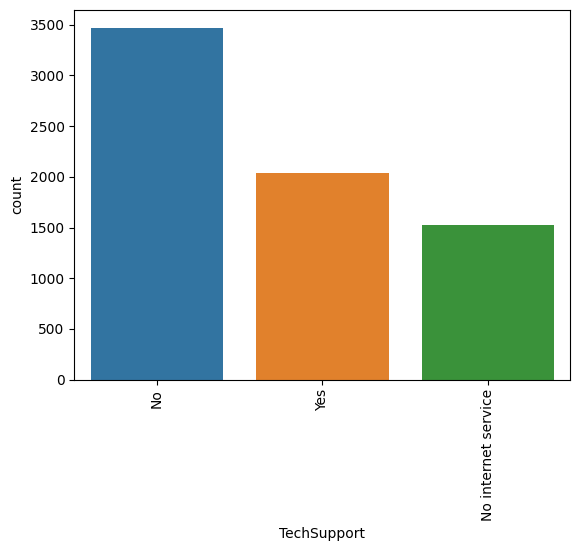

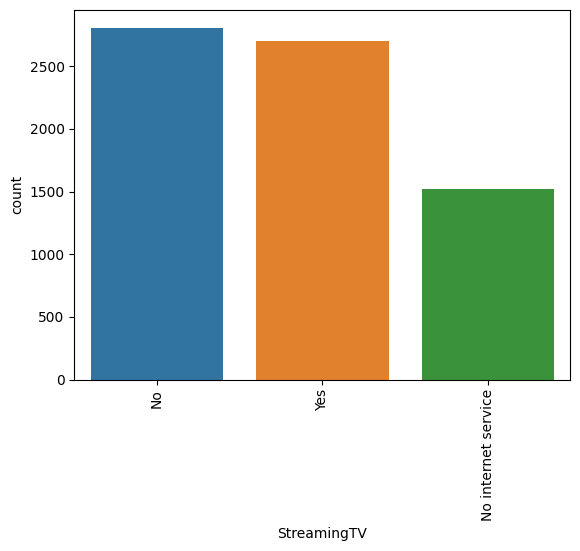

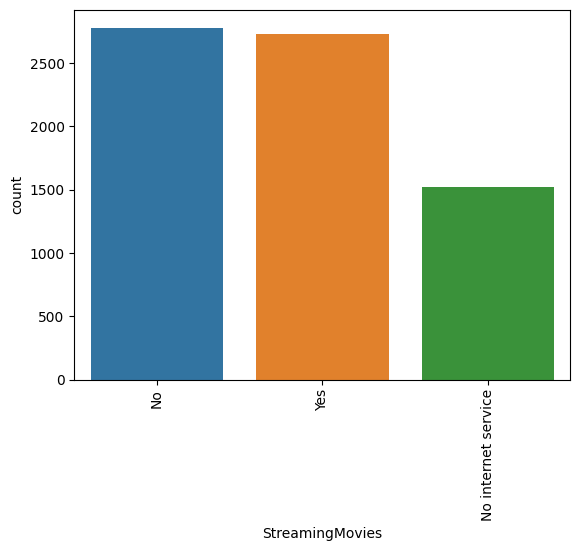

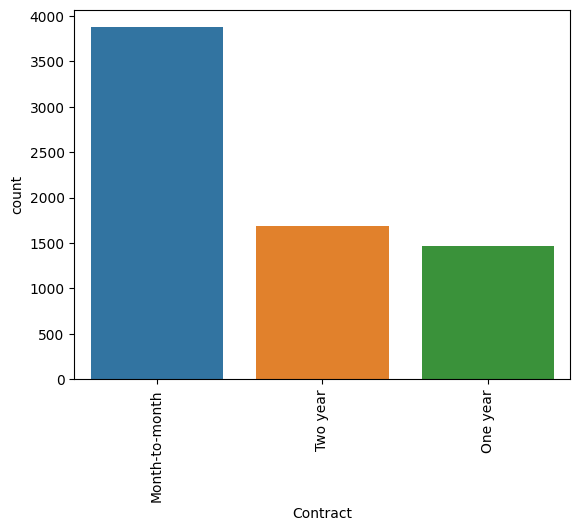

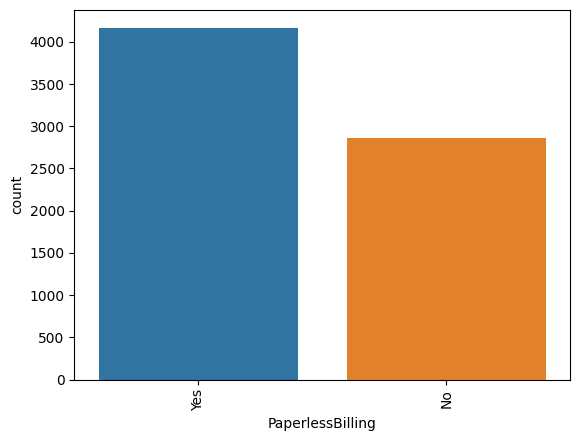

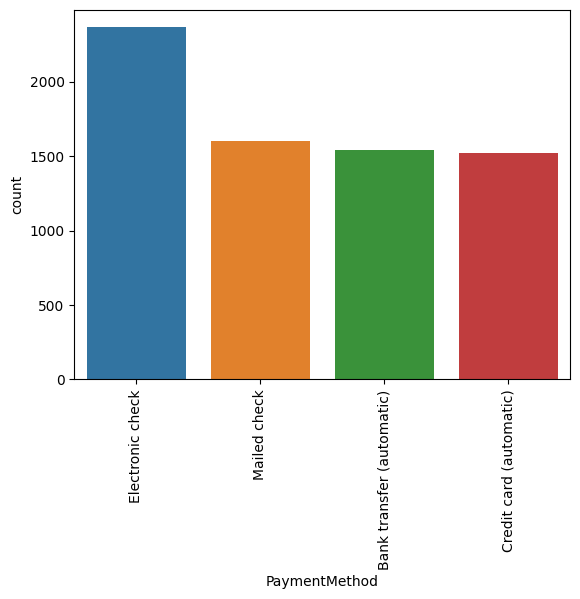

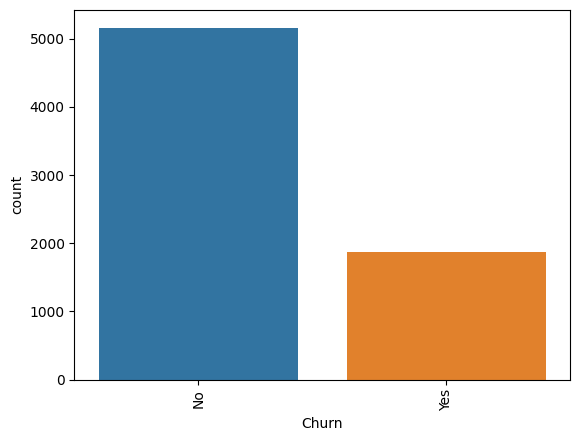

In [512]:
for i in data.select_dtypes(include="object").columns[2:]:
    sns.barplot(data[i].value_counts(),palette=sns.color_palette())
    plt.xticks(rotation=90)
    plt.show()


Both men and women are  **almost the same**

Senior Citizens are **6 times** less when compared to the **aged persons**

Both having Parters and not having the Partners are **almost the same**

**Dependents** are **two and half times (2 1/2)** less than the who are **not Dependent**

Most of the customers have the Phone Service which is **6 times** then the who donot have the **phone serivce**

**Half** of the people have **Multiple lines** and half of the people does not have the **multiple lines** and some people donot have **phone service**

**Most** of the customers are using in the customer check are **Electronic check** and the Least people are choosing the **Credit card(automtic)**

**Most** of the **Customers** Want the **Month to Month** contract when compared to the **other Contract**

tenure


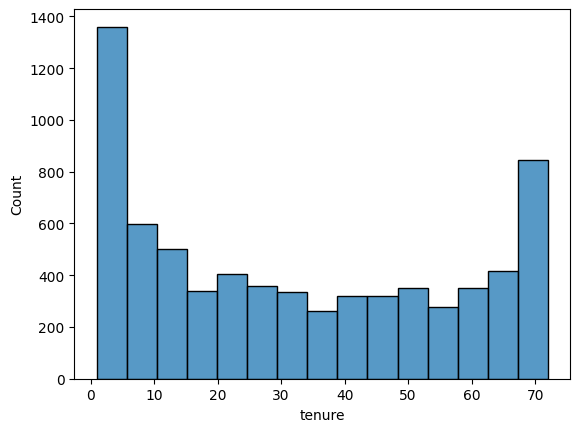

MonthlyCharges


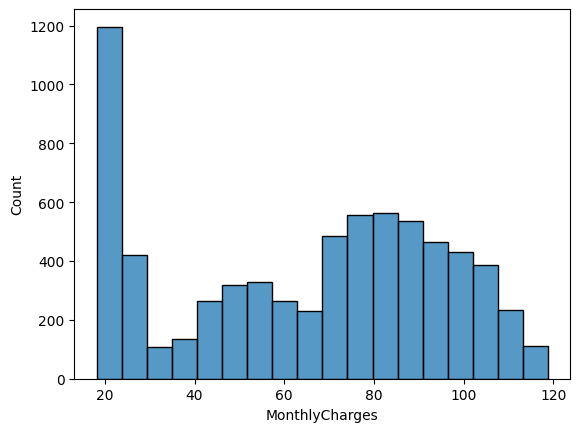

TotalCharges


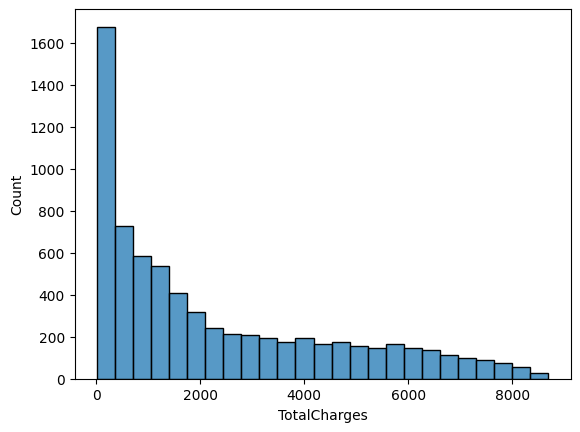

In [505]:
for i in data.select_dtypes(exclude="object"):
    print(i)
    sns.histplot(data[i])
    plt.show()
   

Most of the people have want the tenure of either the less or the more no of the months

Most of the people have have the total Charges is less than 2000

# Bivariate anlaysis

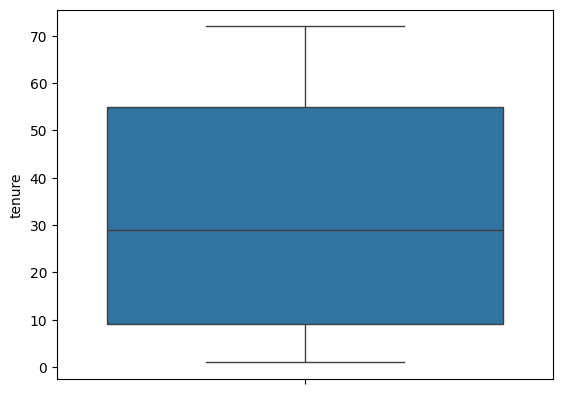

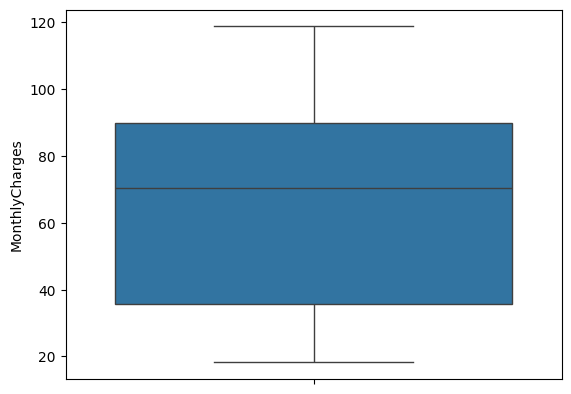

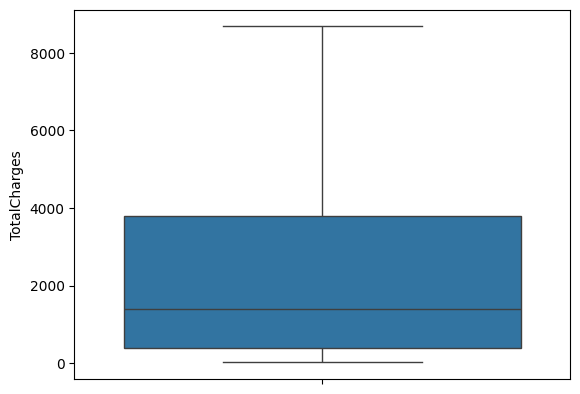

In [506]:
for i in data.select_dtypes(exclude="object").columns:
    sns.boxplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

From the above **three numerical Features** i can see that they are **outlier's**

<Axes: >

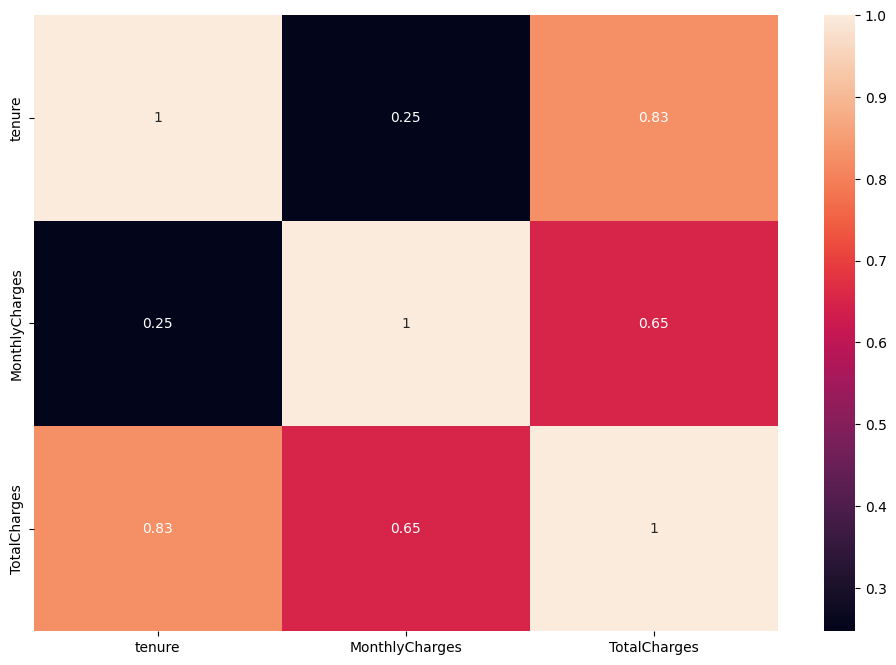

In [507]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)

Total charges with respect to the Tenure is **Directly potiviely corelated**

In [508]:
data.columns[-1]

'Churn'

Mainly foucused on the **Churn** with respect to the **tenure**,**MonthlyCharges** ,**TotalCharges**

  Churn     tenure
0    No  37.650010
1   Yes  17.979133


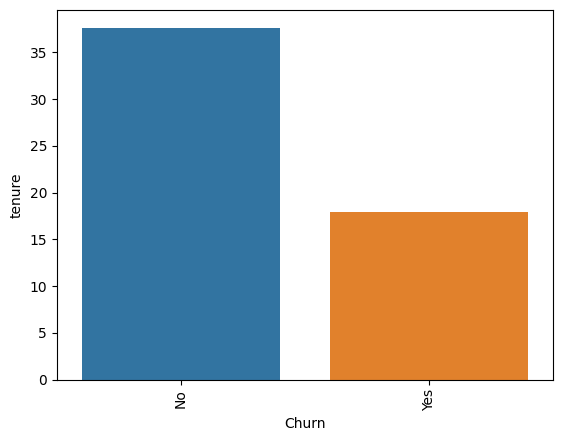

  Churn  MonthlyCharges
0    No       61.307408
1   Yes       74.441332


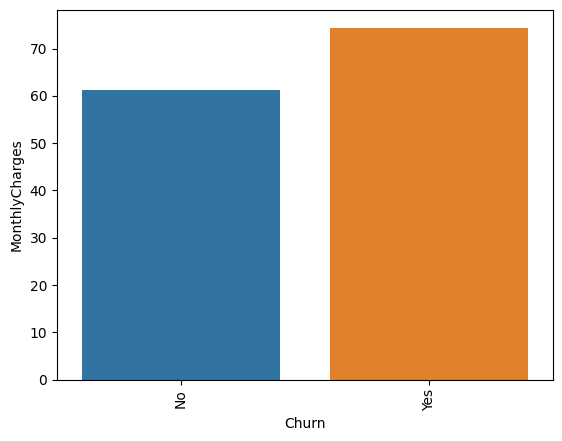

  Churn  TotalCharges
0    No   2555.344141
1   Yes   1531.796094


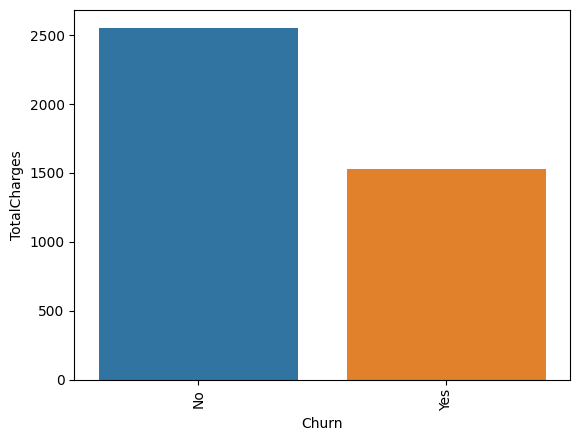

In [485]:
for i in [data.columns[-1]]:
    for j in data.select_dtypes(exclude="object").columns:
        if i!=j:
            a=data.groupby(i)[j].mean().reset_index()
            print(a)
            sns.barplot(data=a,x=i,y=j,palette=sns.color_palette())
            plt.xticks(rotation=90)
            plt.show()

The customer who left has the **less tenure** and less **total charges**

But the **monthly charges** are **more** for those who had left the company

In [384]:
for i in data.select_dtypes(include="object").columns[1:-1]:
    print(f"churn with respect to the {i}")
    print("")
    print(pd.crosstab(data["Churn"],data[i],margins=True))
    print("")
    print("*"*100)
    

churn with respect to the gender

gender  Female  Male   All
Churn                     
No        2544  2619  5163
Yes        939   930  1869
All       3483  3549  7032

****************************************************************************************************
churn with respect to the SeniorCitizen

SeniorCitizen    No   Yes   All
Churn                          
No             4497   666  5163
Yes            1393   476  1869
All            5890  1142  7032

****************************************************************************************************
churn with respect to the Partner

Partner    No   Yes   All
Churn                    
No       2439  2724  5163
Yes      1200   669  1869
All      3639  3393  7032

****************************************************************************************************
churn with respect to the Dependents

Dependents    No   Yes   All
Churn                       
No          3390  1773  5163
Yes         1543   326  1869
All  

churn with respect to the Contract :- The customers who are leaving **Month-to-month**  contract are **10 times more** when compared to the **One year or two year**

churn whith respect to the senior citizen :- The Perosons who are **not senior citizens** are **more** when compared to the Senior citizens

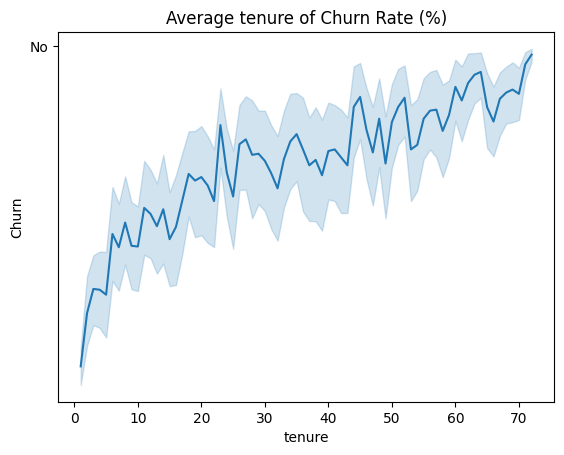

In [414]:
churn_rate = data.groupby('Churn')['tenure'].mean().reset_index()
sns.lineplot(x='tenure', y='Churn', data=data)

plt.title('Average tenure of Churn Rate (%)')
plt.show()

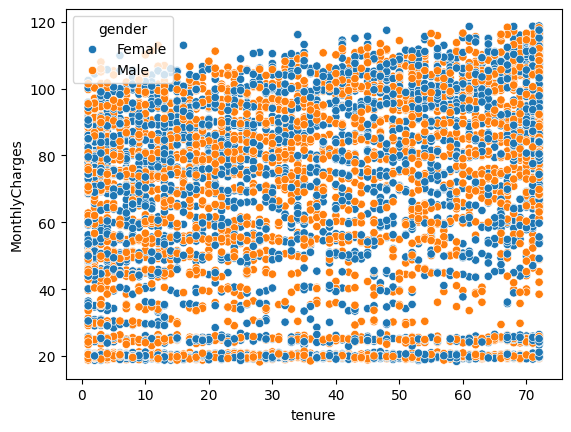

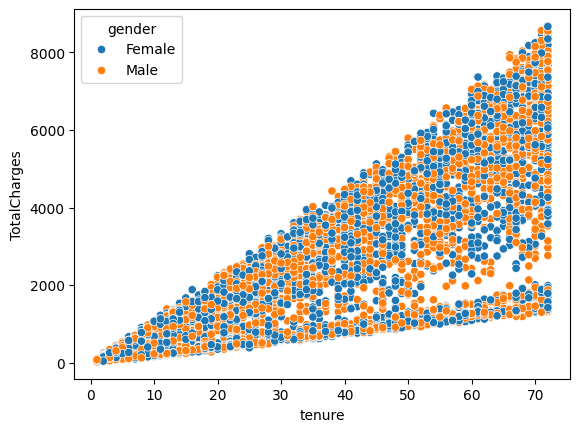

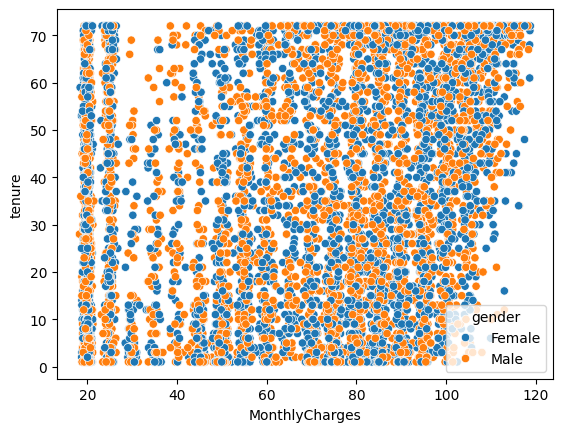

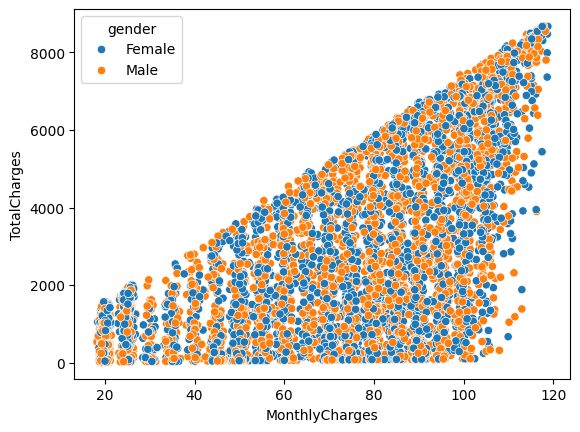

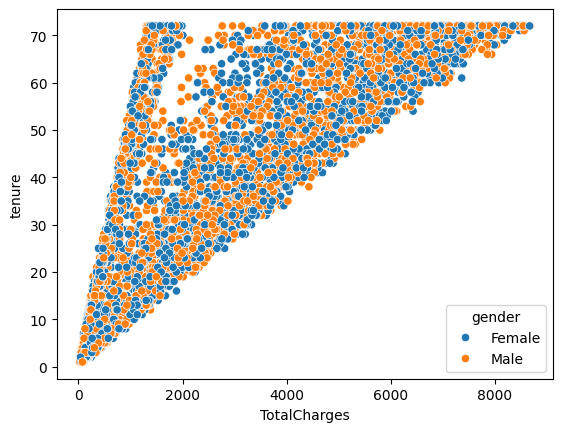

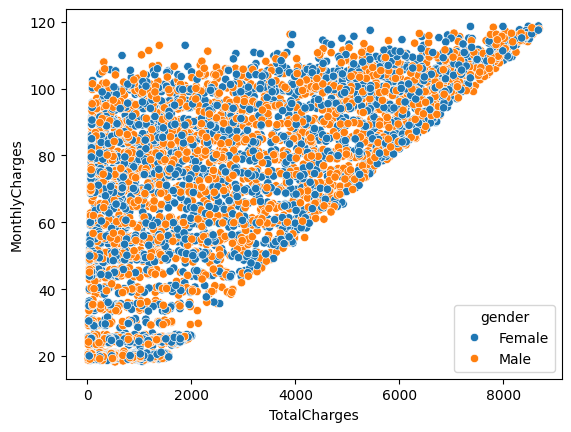

In [478]:
for i in data.select_dtypes(exclude="object"):
    for j in data.select_dtypes(exclude="object"):
        if i!=j:
            sns.scatterplot(data=data,x=i,y=j,hue="gender")
            plt.show()

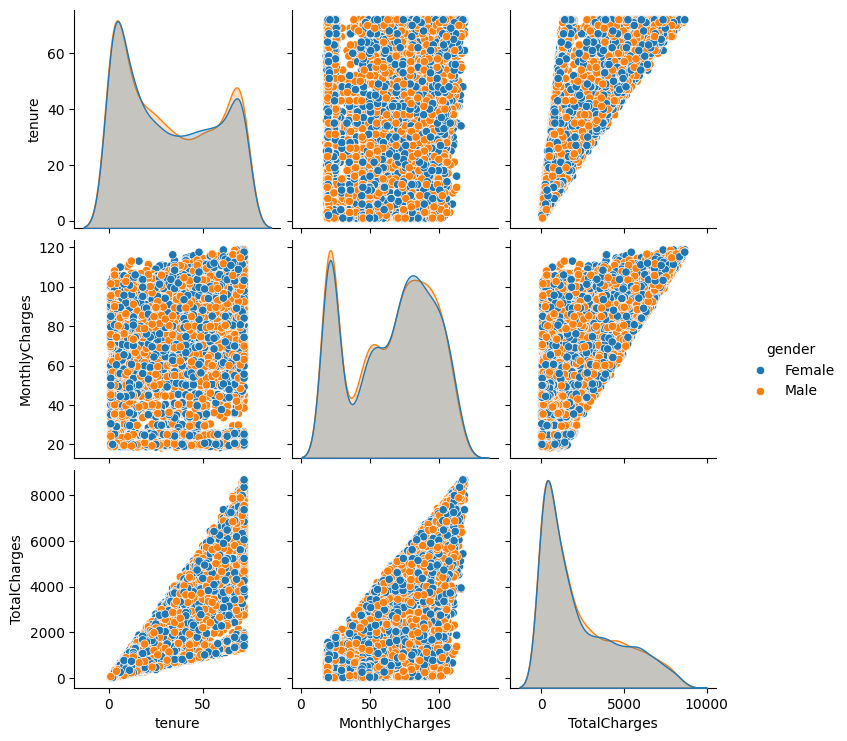

In [480]:
sns.pairplot(data,hue="gender")

### Customer Churn Rate

In [529]:
len(data[data["Churn"]=="Yes"])/len(data)*100

26.578498293515356

The **attrtition rate** for the Given data is **26%** which is more when we come in to the persepctive anlysis of an manager

### Spliting th edata

In [434]:
cv=data["Churn"]

In [437]:
fv=data.drop("Churn",axis=1)

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,f1_score
import pandas as pd
import time

In [441]:
X_train, X_test, y_train, y_test = train_test_split(fv, cv, test_size=0.2, random_state=10)

# Bulding an Model

#### Building the pipeline

##### numerical_pipeline

In [442]:
numerical_pipeline = Pipeline(steps=[
    ("scaling", StandardScaler())
])
numerical_pipeline

Pipeline(steps=[('scaling', StandardScaler())])

##### categorical_pipeline

In [443]:
categorical_pipeline = Pipeline(steps=[
    ("encoding", OneHotEncoder())
])
categorical_pipeline

Pipeline(steps=[('encoding', OneHotEncoder())])

In [444]:
preprocessor = ColumnTransformer(transformers=[
    ("numerical", numerical_pipeline, numerical_features),
    ("categorical", categorical_pipeline, categorical_features)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder())]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

### Because it is an classification algorithm

### Hyper Parameter Tuning

In [455]:
pipelines_classification = {
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classifier': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classifier': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'knn_classifier': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'svc': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])
}

In [456]:
# Update parameter grids to include options for each classifier
param_grids_classification = {
    'logistic_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10]
        }
    ],
    'sgd_classifier': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    ],
    'decision_tree_classifier': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'knn_classifier': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'classifier__n_neighbors': [i for i in range(1, 30, 2)],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'svc': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly']
        }
    ]
}

In [460]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

best_models_classification = {}

for algorithm in pipelines_classification.keys():    
    grid_search = GridSearchCV(estimator=pipelines_classification[algorithm], 
                               param_grid=param_grids_classification[algorithm], 
                               cv=5, 
                               scoring='f1_micro',  # Correct scoring metric for f1_micro
                               return_train_score=True,
                               verbose=1)
    
    grid_search.fit(X_train, y_train)
    best_models_classification[algorithm] = grid_search.best_estimator_
    
    y_pred_test = grid_search.predict(X_test)
    print('F1 Score on Test Data for', algorithm, ':', f1_score(y_test, y_pred_test, average='micro'))
    
    # Print best parameters
    print("Best Parameters for", algorithm, ":", grid_search.best_params_)
    print("*" * 100)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
F1 Score on Test Data for logistic_regression : 0.806680881307747
Best Parameters for logistic_regression : {'classifier__C': 10, 'preprocessor__numerical__scaling': MinMaxScaler()}
****************************************************************************************************
Fitting 5 folds for each of 18 candidates, totalling 90 fits
F1 Score on Test Data for sgd_classifier : 0.8024164889836531
Best Parameters for sgd_classifier : {'classifier__alpha': 0.01, 'classifier__penalty': 'l1', 'preprocessor__numerical__scaling': MinMaxScaler()}
****************************************************************************************************
Fitting 5 folds for each of 6 candidates, totalling 30 fits
F1 Score on Test Data for decision_tree_classifier : 0.8009950248756219
Best Parameters for decision_tree_classifier : {'classifier__max_depth': 5, 'preprocessor__numerical__scaling': StandardScaler()}
*************************

In [464]:
best_models_classification.keys()

dict_keys(['logistic_regression', 'sgd_classifier', 'decision_tree_classifier', 'knn_classifier', 'svc'])

ML MODEL EVALUATION
****************************************************************************************************
logistic_regression
Accuracy Score: 0.806680881307747
Precision Score: 0.801310289965637
Recall Score: 0.806680881307747
F1 Score: 0.8034499262609079


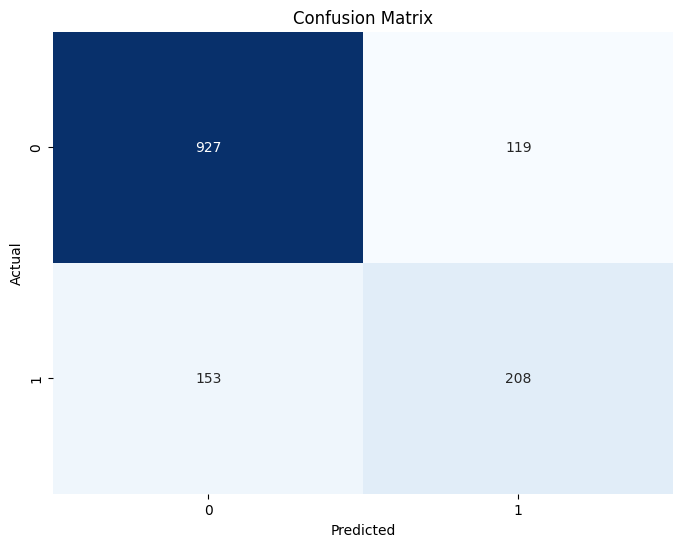

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
sgd_classifier
Accuracy Score: 0.8024164889836531
Precision Score: 0.7957643357722071
Recall Score: 0.8024164889836531
F1 Score: 0.7982590003366955


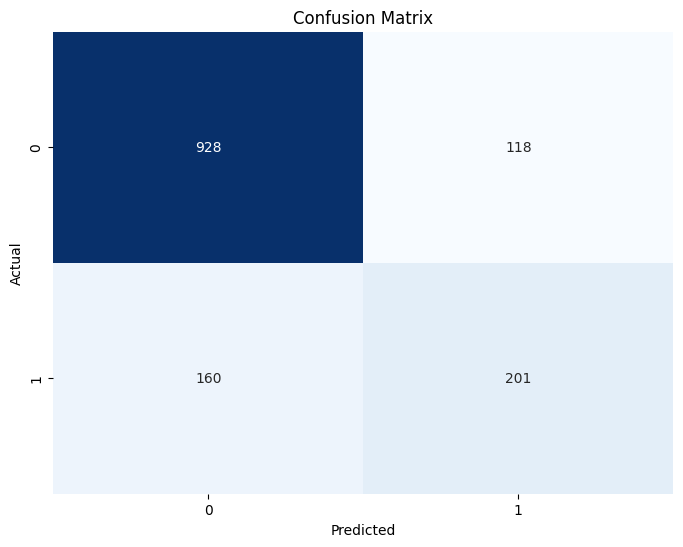

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
decision_tree_classifier
Accuracy Score: 0.8009950248756219
Precision Score: 0.8055930730873044
Recall Score: 0.8009950248756219
F1 Score: 0.8030414095431544


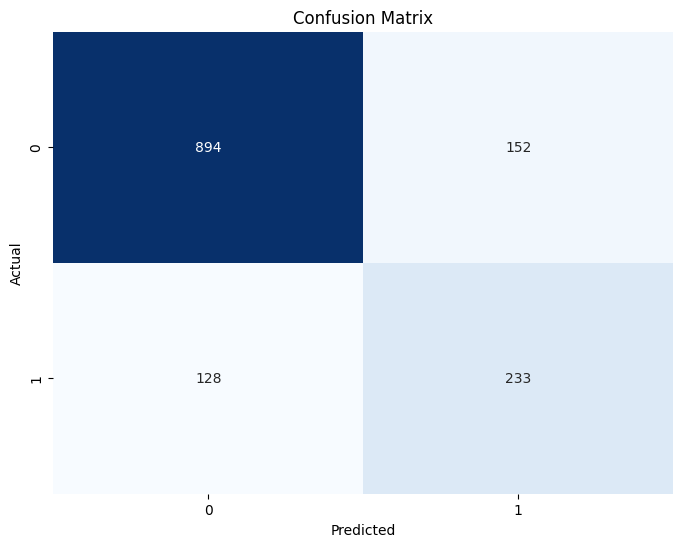

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
knn_classifier
Accuracy Score: 0.7846481876332623
Precision Score: 0.7860350084981806
Recall Score: 0.7846481876332623
F1 Score: 0.7853206108150412


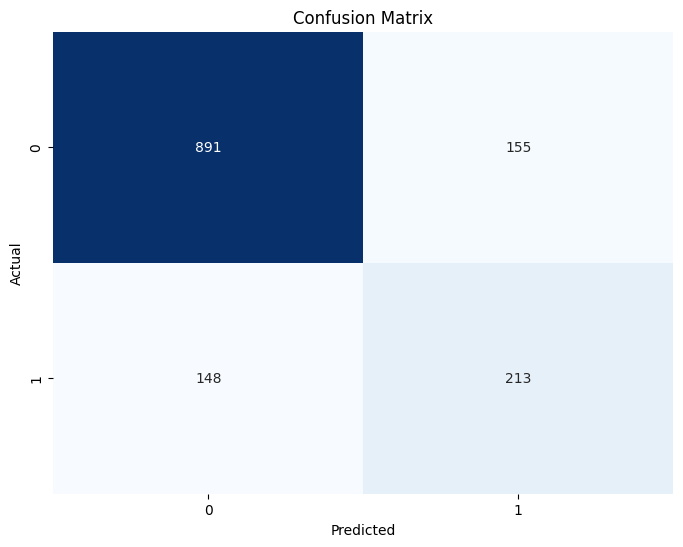

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
svc
Accuracy Score: 0.8109452736318408
Precision Score: 0.8020466500566307
Recall Score: 0.8109452736318408
F1 Score: 0.8043259116384892


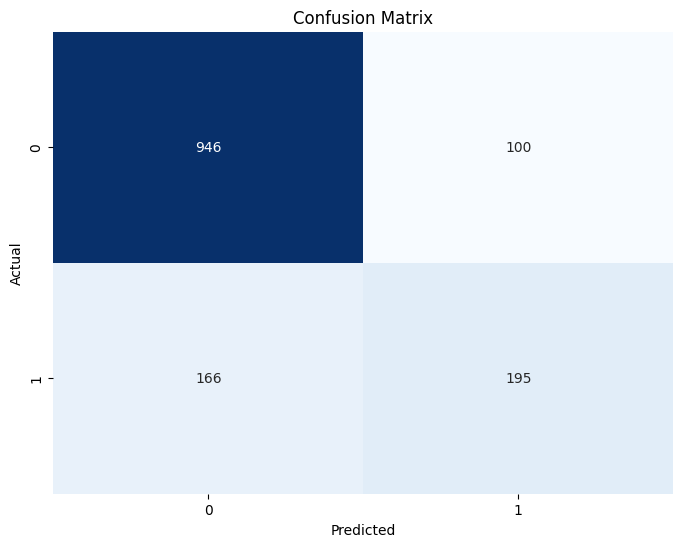

****************************************************************************************************


In [515]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score

for name, model in best_models_classification.items():
    print("ML MODEL EVALUATION")
    print("*"*100)
    print( name)
    y_test_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Precision Score:", precision_score(y_test, y_test_pred,average="weighted"))
    print("Recall Score:", recall_score(y_test, y_test_pred,average="weighted"))
    print("F1 Score:", f1_score(y_test, y_test_pred,average="weighted"))
    # Assuming y_pred and y_test are defined
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("*"*100)


Based on the F1_score i can say that svc is more correct prediction than the other Models

In [472]:
import pickle

In [473]:
for algorithm, model in best_models_classification.items():
    model_filename = f"best_model{algorithm}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {model_filename}")

Model saved as best_modellogistic_regression.pkl
Model saved as best_modelsgd_classifier.pkl
Model saved as best_modeldecision_tree_classifier.pkl
Model saved as best_modelknn_classifier.pkl
Model saved as best_modelsvc.pkl
